# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
try:
  # смотрим есть ли локально файл
  df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
  # если же его нет
  df = pd.read_csv('real_estate_data.csv', sep='\t')

In [ ]:
# посмотрим размер таблицы
df.shape

(23699, 22)

In [ ]:
# выведем первые 5 строк
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
# выведем последние 5 строк
pd.set_option('display.max_columns', None)
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# посмотрим типы данных у столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

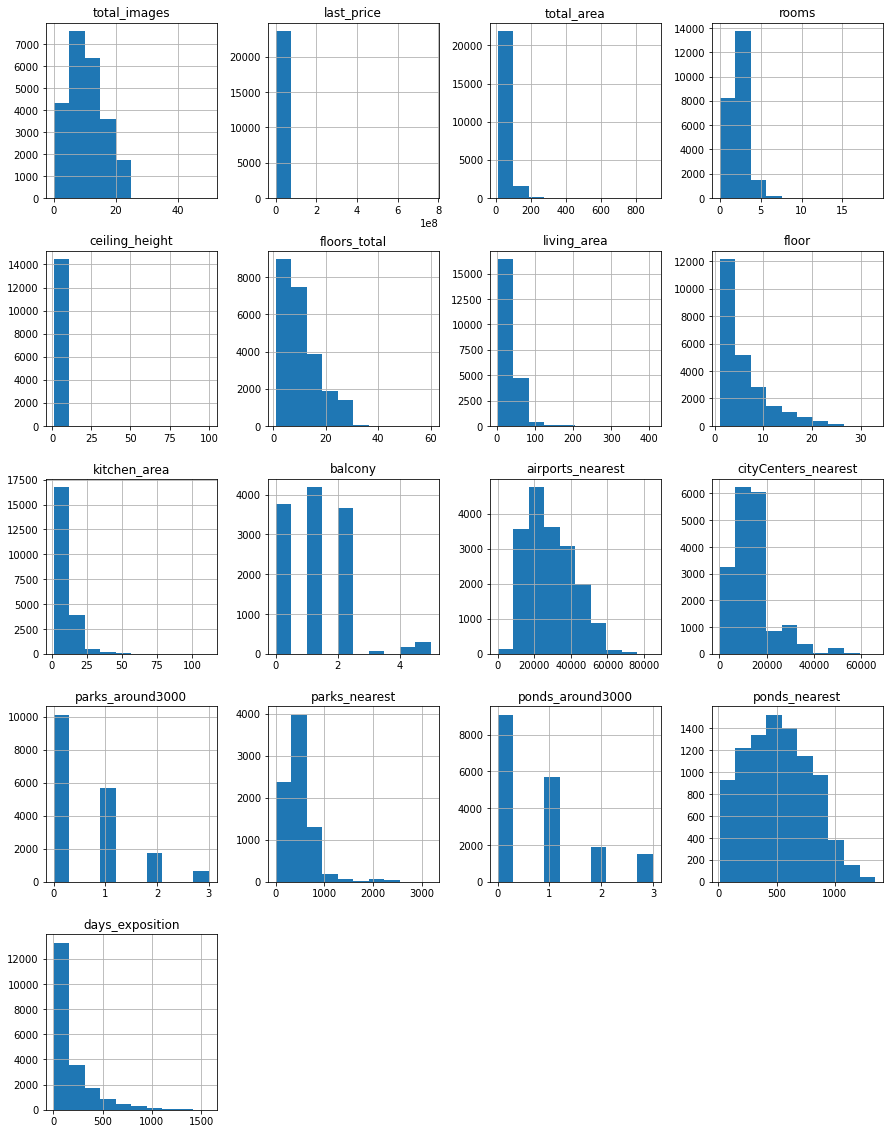

In [ ]:
# построим общую гистограмму для всех числовых столбцов
df.hist(figsize=(15,20));

<div class="alert alert-info">
<b>Изучив общую информацию заметила, что в данных имеется большое количество пропусков, их следует оценить и по возможности заменить подходящими значениями. Для некоторых полей следует изменить типы данных. Поле  cityCenters_nearest лучше переименовать. Найим и избавиться от дубликатов и странных значений.
</b>
<br>
</div>

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах:

In [ ]:
# оценим суммарные пропуски
df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [ ]:
# посмотрим процент пропуск в колонках
df.isna().mean().sort_values(ascending=False) * 100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

Таблицы выше показывают большое количество пропусков в данных, делаю вывод, что данные, которые заполнял пользователь в основном заполнены,большинство пропусков в картографических данных и их очень много. Скорей всего проблема картографических материалов проявляется в том, что карта, как канал передачи информации обладает определенными ограничениями, в частности на объем передаваемой информации, точности даных. Возможно пользователи заводят информацию о местоположении не совсем точно, либо на картах нет таких обьектов, либо просто в городе например нет аэропорта, либо расстояние до него очень большое и скорей всего эти значения не будут существенными при определении цены на недвижимость.
в следующих полях есть пропуски значений:

- is_apartment - аппартаменты, поле нужно заменить на тип bool и пропуски заменить на False
- parks_nearest, ponds_nearest, airports_nearest, cityCenters_nearest, ponds_around3000, parks_around3000    - расстояние до ближайшего парка, водоема, аэропорта, число водоемов и парков это картографические данные, возможно не верно получены  
- balcony - количество балконов, можно заменить на 0, скорей всего балконов в квартирах нет
- ceiling_height - высота потолков, можно заменить на среднее значение
- kitchen_area, living_area - площад кухни и гостинной можно заменить на средние значения
- locality_name, floors_total - поля где отсутсвует локация и количество этажей не много и их можно удалить
- days_exposition - количество дней продажи квартиры можно можно заменить на 0

In [ ]:
# Все пустые знаения можно заменить на False
df['is_apartment'] = df['is_apartment'].fillna(False)

In [ ]:
# приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
df['balcony'].value_counts()
df['balcony'] = df['balcony'].fillna(0).astype('int')

In [ ]:
# Пропущенные значения в поле ceiling_height предлагаю заполнить медианным значением
print('Медианная высота потолков:',df.ceiling_height.median())
df.ceiling_height = df.ceiling_height.fillna(2.65)

Медианная высота потолков: 2.65


In [ ]:
# заменяем пустые значения жилой площади и площади кухни на средние
living_ratio = df['living_area'].mean() / df['total_area'].mean()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

In [ ]:
# удаляем записи, где отсутствует локация и этажность
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)

#### Рассмотрите типы данных в каждом столбце:

In [ ]:
# посмотрим типы данных у столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [ ]:
# переведем is_apartment в формат bool.
df['is_apartment'] = df['is_apartment'].astype('bool')

поле is_apartment имеет тип object, хотя данные там подразумеваются True и False типа bool

In [ ]:
# переведем first_day_exposition в формат date. Время не указано, поэтому формат без времени:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

в поле first_day_exposition имеет тип object, хотя там хранится дата публикации поэтому заменим на тип date

In [ ]:
# приведем название поля cityCenters_nearest в правильный формат
df.columns = df.columns.str.lower().str.replace(" ", "_")

в названии поля cityCenters_nearest есть заглавные буквы, что лучше исправить

In [ ]:
#изменим цену на тип int для удобства просмотра
df['last_price'] = df['last_price'].astype('int')

last_price для удобства тоже лучше заменить на int

In [ ]:
# приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)
# приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)

Количество парков и водоемов тоже лучше перевести в целочисленный тип и для этого пропуски заменить на 0

In [ ]:
#заменим пропуски в days_exposition на 0 и заменим тип данных на int
#df['days_exposition'] = df['days_exposition'].fillna(0).astype('int')

In [ ]:
# заменим тип данных на int
df['days_exposition'] = np.floor(pd.to_numeric(df['days_exposition'], errors='coerce')).astype('Int64')

Количество дней размещения тоже лучше преобразовать в тип int

In [ ]:
#изменим цену на тип int для удобства просмотра
df['last_price'] = df['last_price'].astype('int')

для удобства просмотра цену тоже лучше заменить на тип int

In [ ]:
# изменим float64 на float32 для экономии памяти
df['total_area'] = df['total_area'].fillna(0).astype('float32')
df['ceiling_height'] = df['ceiling_height'].fillna(0).astype('float32')
df['floors_total'] = df['floors_total'].fillna(0).astype('float32')
df['living_area'] = df['living_area'].fillna(0).astype('float32')
df['kitchen_area'] = df['kitchen_area'].fillna(0).astype('float32')
df['airports_nearest'] = df['airports_nearest'].fillna(0).astype('float32')
df['citycenters_nearest'] = df['citycenters_nearest'].fillna(0).astype('float32')
df['parks_nearest'] = df['parks_nearest'].fillna(0).astype('float32')
df['ponds_nearest'] = df['ponds_nearest'].fillna(0).astype('float32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float32       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float32       
 6   floors_total          23565 non-null  float32       
 7   living_area           23565 non-null  float32       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float32       
 13  balcony         

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты

In [ ]:
# Уникальные значения в алфавитном порядке
df['locality_name'].unique()

# Замним неявные дубликаты, устраним их... приведём значения к нижнему регистру для избавления от дубликатов
df['locality_name'] = df['locality_name'].str.lower()

# Выполним замену ошибки в написании 'поселок' вместо 'посёлок':
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок')

# Замена однотипный значений
df['locality_name'] = df.locality_name.str.replace('поселок городского типа', 'поселок')
df['locality_name'] = df.locality_name.str.replace('городской поселок', 'поселок')


Заметили неявные дубликаты. например поселок Бугры и посёлок Бугры, поселок Тельмана и посёлок Тельмана, поселок городского типа Рябово и поселок Рябово

#### Найдите и устраните редкие и выбивающиеся значения

<AxesSubplot:ylabel='Frequency'>

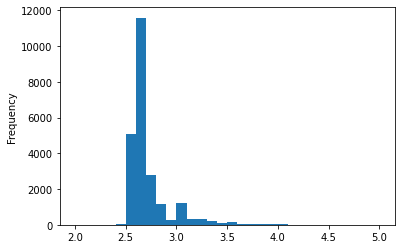

In [ ]:
#отсортируем и выведем самые большие значения для ceiling_height
df[df['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)
df['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))

Для поля ceiling_height (высота потолков) видим очень большое максимальное значение (100м!) Хотя медиана от среднего отличается не сильно из-за этих выбросов во всей выборке, но все же нужно посмотреть это поле внимательней. Видим, что в некоторых полях высота потолков напрмер 32. Логично предположить что это вещественные значения 3.2 Исправим это.

По результату проведённой обработки данных, были достигнуты вышеизложенные цели: заполненны пропуски где это было возможно, и измененны типы данных, обработаны дубликаты. Довольно большая часть данных, которая может влиять на итоговую статистику, а так же на решение о прибретении квартир, потеряна при выгрузке таблицы либо отсутствует. Об этом обязательно необходимо сообщить  сотрудникам, ответственным за выгрузку данных.

In [ ]:
# ограничим высоту потолка 6 метрами (потеряем 29 записей)
df_del = df.query('ceiling_height < 7').copy()
# посмотрим поле количесво комнат, максимальное 19! есть 16, 15, 14...
df.rooms.describe()
df.rooms.sort_values().tail(20)
# ограничим количество комнат до 9 (потеряем 8 записей)
df_del = df.query('rooms < 10').copy()
# посмотрим поле общая площадь есть квартиры 900 кв м
df.total_area.describe()
df.total_area.sort_values().tail(20)
# ограничим площадь до 500 (потеряем 7 записей)
df_del = df.query('total_area > 500').copy()
# посмотрим поле цена
df.last_price.describe()
df.last_price.sort_values().tail(40)
# ограничим цену до 100 миллионов (потеряем 37 записей)
df_del = df.query('last_price < 100000000').copy()
df_del.shape[0] / df.shape[0] * 100
df = df_del

### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
df['sm_price'] = df['last_price'] / df['total_area']
df['sm_price'] = df['sm_price'].astype(int)

In [ ]:
# Добавляем столбцы дня недели, месяца и года
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [ ]:
# Добавляем столбец - тип этажа квартиры
# для этого напишем функцию и разделим все этажи на группы
def floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_group'] = df.apply(floor, axis=1)
df['floor_group'].value_counts()

другой       17304
последний     3316
первый        2908
Name: floor_group, dtype: int64

In [ ]:
# расстояние до центра города в км и округляем до целых значенией
df['distance_citycenter_km'] = round(df['citycenters_nearest'] / 1000)
try:
    df['distance_citycenter_km'] =  round(df['distance_citycenter_km'], 2).astype('Int32')
    print('Все готово!')
except:
    print('тип не int')

Все готово!


### Проведите исследовательский анализ данных

#### Изучите следующие параметры объектов

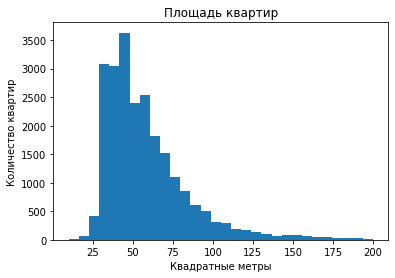

Наибольшие по площади варианты:
5358     590.000000
4237     517.000000
8018     507.000000
12401    495.000000
9826     494.100006
22494    491.000000
6621     488.000000
660      483.899994
6221     470.299988
20273    460.799988
Name: total_area, dtype: float32


In [ ]:
# Изучим общую площадь
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['total_area'].sort_values(ascending=False).head(10))

Основная часть квартир имеет площадь до 100 квадратных метров. Есть несколько больших квартир с площадью до 900 кв.м

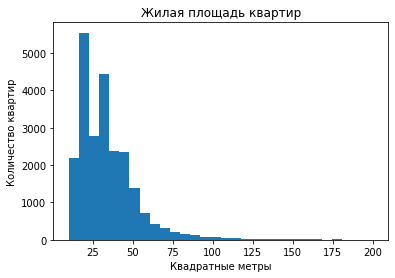

Наибольшие по площади варианты:
5358     409.000000
12401    347.500000
4237     332.000000
660      312.500000
8018     301.500000
14088    300.000000
9826     282.121063
20273    279.600006
22494    274.000000
14498    264.500000
Name: living_area, dtype: float32


In [ ]:
# Изучим жилую площадь
plt.hist(df['living_area'], bins=30, range=(10,200))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['living_area'].sort_values(ascending=False).head(10))

Основная часть квартир имеет жилую площадь до 60 квадратных метров. Есть несколько больших квартир с жилой площадью до 200 кв.м

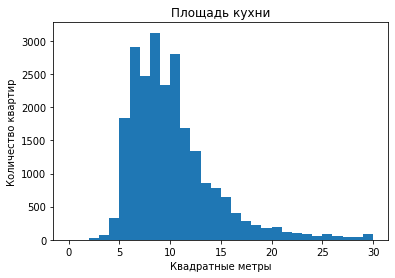

Наибольшие по площади кухни варианты:
20215    107.000000
2489     100.699997
5358     100.000000
16239     93.199997
16797     93.000000
10867     87.199997
9826      86.539497
4394      77.000000
492       77.000000
14644     75.000000
Name: kitchen_area, dtype: float32


In [ ]:
# Изучим  площадь кухни
plt.hist(df['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(df['kitchen_area'].sort_values(ascending=False).head(10))

Самые распространённые кухни - от 5 до 15 метров.

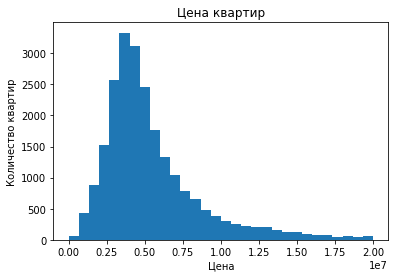

Наибольшие по цене варианты:
5631     99000000
6621     99000000
16590    98000000
155      96000000
11329    95000000
492      95000000
12401    91500000
22494    91075000
509      90000000
15151    88000000
Name: last_price, dtype: int64


In [ ]:
# Изучим цены объектов
plt.hist(df['last_price'], bins=30, range=(0,20000000))
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(df['last_price'].sort_values(ascending=False).head(10))

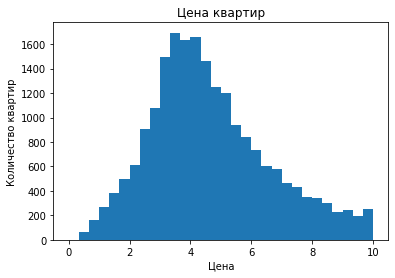

Наибольшие по цене варианты:
5631     99.000
6621     99.000
16590    98.000
155      96.000
11329    95.000
492      95.000
12401    91.500
22494    91.075
509      90.000
15151    88.000
Name: last_price, dtype: float64


In [ ]:
# разделим цену на миллион и будем считать что цена указана в миллионах
df['last_price'] = df['last_price'].astype('float32')
df['last_price'] = df['last_price'] / 1000000
plt.hist(df['last_price'], bins=30, range=(0,10))
plt.title('Цена квартир')
plt.xlabel('Цена')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(df['last_price'].sort_values(ascending=False).head(10))

Больше всего квартир, стоимостью 5 миллионов, но есть и дорогие более 20 миллионов.

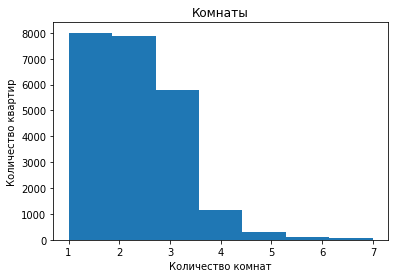

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
866      14
20829    14
648      11
9688     11
4149     10
18119    10
18891    10
Name: rooms, dtype: int64


In [ ]:
# Количество комнат
plt.hist(df['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(df['rooms'].sort_values(ascending=False).head(10))

Больше всего 1,2, 3 комнатных квартир, но есть и более 5 комнат.

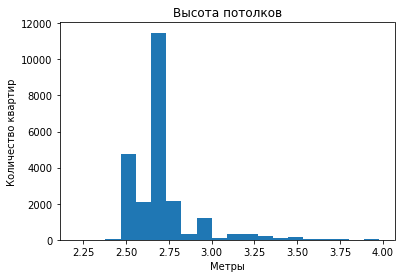

Наибольшие по высоте потолков варианты:
22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
4876      27.0
22938     27.0
5807      27.0
5246      27.0
17857     27.0
Name: ceiling_height, dtype: float32


count    23528.000000
mean         2.723510
std          0.990975
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [ ]:
# Высота потолков
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(df['ceiling_height'].sort_values(ascending=False).head(10))
df['ceiling_height'].describe()

Потолки в квартирах восновном от 2,5 до 2,75 метров, но есть выбросы до 100 м. Но их не много и на среднее значение они не сильно влияют.

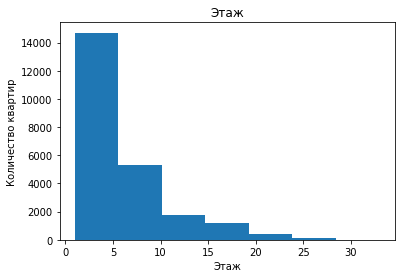

Наибольшие по этажу варианты:
14498    19
18848    16
5358     15
866      14
20829    14
648      11
9688     11
4149     10
18119    10
18891    10
Name: rooms, dtype: int64


In [ ]:
# Этаж квартиры
plt.hist(df['floor'], bins=7, range=(1,33))
plt.title("Этаж")
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по этажу варианты:')
print(df['rooms'].sort_values(ascending=False).head(10))

Больше всего квартир продается на 2-10 этажи.

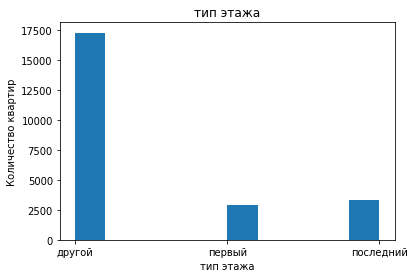

In [ ]:
# Тип этажа квартиры
plt.hist(df['floor_group'])
plt.title("тип этажа")
plt.xlabel('тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Больше всего квартир на других этажах (не на первом и не на последнем). На последнем этаже в продаже чуть больше квартир, чем на первом.

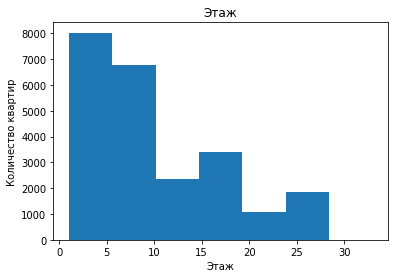

Наибольшие по этажу варианты:
2253     60.0
16731    52.0
16934    37.0
5807     36.0
397      36.0
11079    36.0
9186     35.0
1060     35.0
12888    35.0
15982    35.0
Name: floors_total, dtype: float32


In [ ]:
# Общее количество этажей в доме
plt.hist(df['floors_total'], bins=7, range=(1,33))
plt.title("Этаж")
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по этажу варианты:')
print(df['floors_total'].sort_values(ascending=False).head(10))

Судя по графику большая часть квартир продается в 5 этажных домах, на втором месте 10 этажные, меньше всего квартир в домах  в 20-25 этажей

Text(0, 0.5, 'Количество квартир')

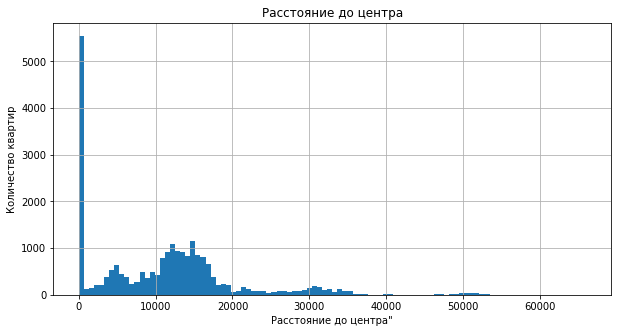

In [ ]:
# Расстояние до центра города в метрах
df.hist('citycenters_nearest', bins=100, figsize=(10,5))
plt.title("Расстояние до центра")
plt.xlabel('Расстояние до центра"')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

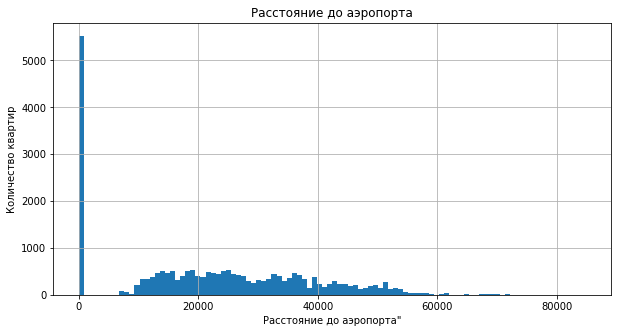

In [ ]:
# расстояние до ближайшего аэропорта
df.hist('airports_nearest', bins=100, figsize=(10,5))
plt.title("Расстояние до аэропорта")
plt.xlabel('Расстояние до аэропорта"')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

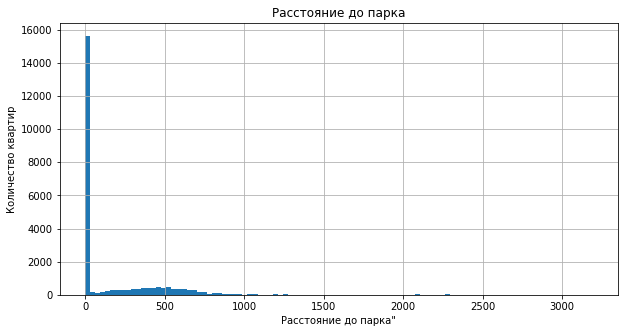

In [ ]:
# расстояние до ближайшего парка
df.hist('parks_nearest', bins=100, figsize=(10,5))
plt.title("Расстояние до парка")
plt.xlabel('Расстояние до парка"')
plt.ylabel('Количество квартир')

Text(0, 0.5, 'Количество квартир')

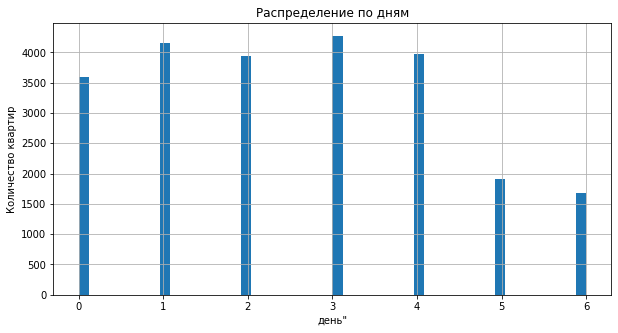

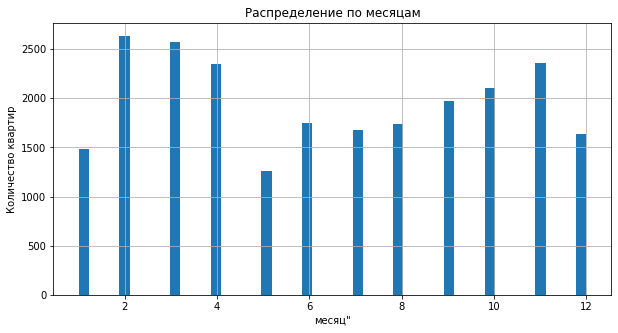

In [ ]:
# день и месяц публикации объявления
df.hist('weekday', bins=50, figsize=(10,5));
plt.title("Распределение по дням")
plt.xlabel('день"')
plt.ylabel('Количество квартир')
df.hist('month', bins=50, figsize=(10,5));
plt.title("Распределение по месяцам")
plt.xlabel('месяц"')
plt.ylabel('Количество квартир')

Чаще всего продают квартиры с февраля (самый пик) по апрель и с сентября по ноябрь. А самые популярные дни для размещения объявлений - вторник и четверг.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

In [ ]:
# изучим время продажи квартиры
df.days_exposition.describe()

count    20362.000000
mean       180.492535
std        219.560918
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Здесь видим, что медиана 73 сильно ниже, чем среднее, значит в выборке есть выбросы. Посмотрим на графике

Время продаж


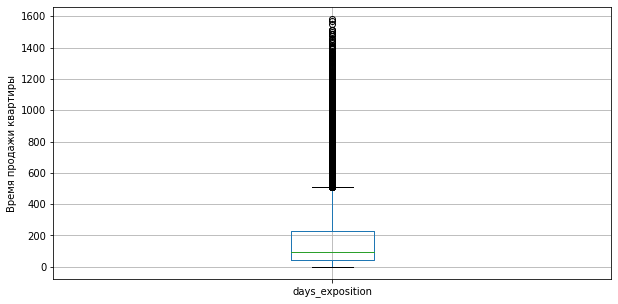

In [ ]:
print('Время продаж')
df.boxplot('days_exposition', figsize=(10,5))
plt.ylabel('Время продажи квартиры')
plt.show()

In [ ]:
# уберем выбросы
df = df.query('days_exposition < 250')

Время продаж


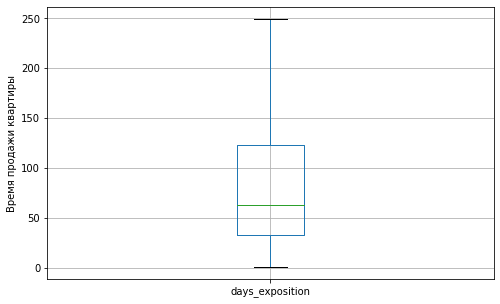

In [ ]:
print('Время продаж')
df.boxplot('days_exposition', figsize=(8,5))
plt.ylabel('Время продажи квартиры')
plt.show()

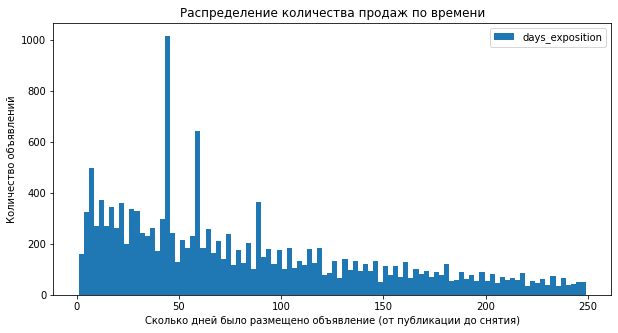

count    15642.000000
mean        83.089247
std         63.470526
min          1.000000
25%         33.000000
50%         63.000000
75%        123.000000
max        249.000000
Name: days_exposition, dtype: float64

In [ ]:
#Распределение количества продаж по времени
df.plot(kind='hist',y='days_exposition',title='Распределение количества продаж по времени', bins=100, figsize=(10,5))
plt.xlabel('Сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество объявлений')
plt.show()
df.days_exposition.describe()

Выше из данных видим, что среднее время продажи составляет 83 дня, продажи более 123 дней с момента размещения можно считать долгими, а есть квартиры, которые продаются в первые дни публикации, такие продажи считаем быстрыми.  

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

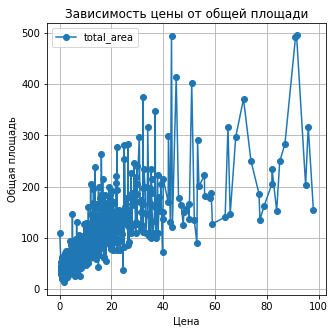

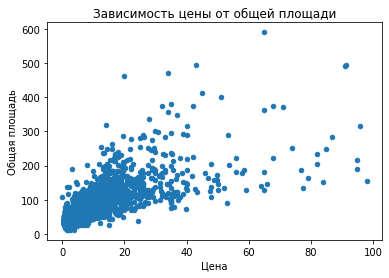

In [ ]:
# изучим зависимость цены от общей площади, построим сводную таблицу и график
df.pivot_table(index='last_price', values='total_area').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от общей площади')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

df.plot.scatter (x = 'last_price', y = 'total_area');
plt.title('Зависимость цены от общей площади')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

С увеличением площади стоимость квартир растет, но самые большие по площади квартиры не самые дорогие, скорей всего они далеко от центра.

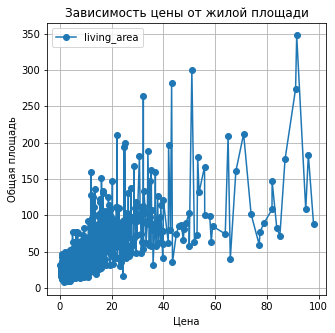

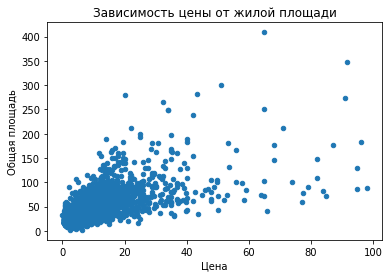

In [ ]:
# изучим зависимость цены от жилой площади, построим сводную таблицу и график
df.pivot_table(index='last_price', values='living_area').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

df.plot.scatter (x = 'last_price', y = 'living_area');
plt.title('Зависимость цены от жилой площади')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

Здесь видим туже зависимость что и для общей площади

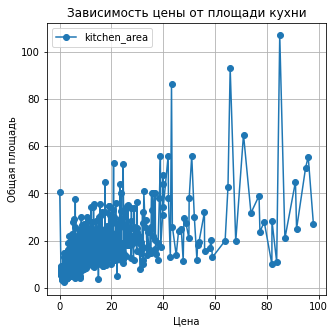

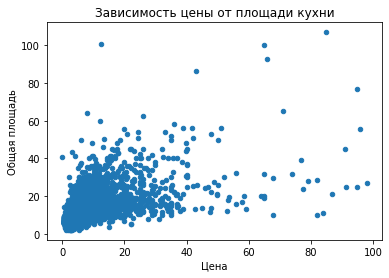

In [ ]:
# изучим зависимость цены от площади кухни, построим сводную таблицу и график
df.pivot_table(index='last_price', values='kitchen_area').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

df.plot.scatter (x = 'last_price', y = 'kitchen_area');
plt.title('Зависимость цены от площади кухни')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

От площади кухни цена зависит так же как от общей площади и жилой.

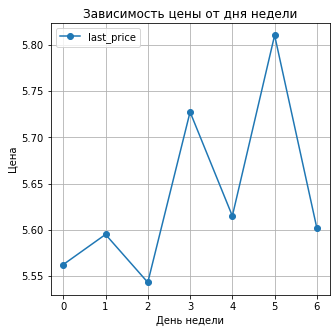

In [ ]:
#изучим зависимость цены от дня размеения построим сводную таблицу и график
df.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Цена')
plt.show()

В течении недели цены колеблются, явный рост видим только в субботу.

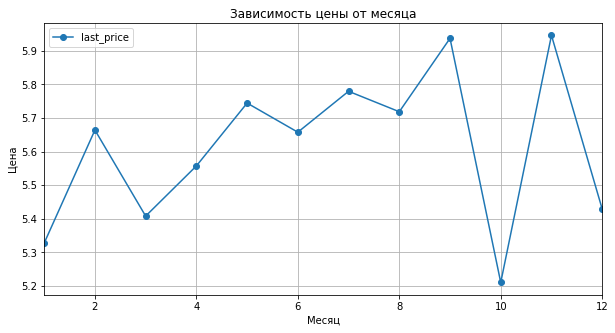

In [ ]:
#изучим зависимость цены от месяца размеения построим сводную таблицу и график
df.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Цена')
plt.show()

Судя по графику наблюдается высокая зависимость стоимости квартиры от месяца, самые высокие цены в апреле и сентябре, а на лето цены падают.

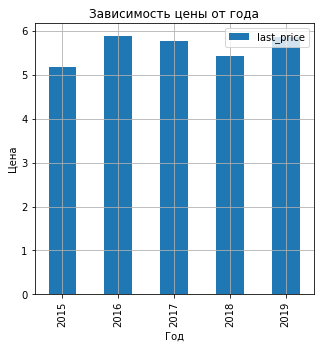

In [ ]:
#изучим зависимость цены от года размещения построим сводную таблицу и график
df.pivot_table(index='year', values='last_price').plot(kind='bar', grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Цена')
plt.show()

Здесь видим падение цен на квартиры с 2014 года, в 2019 намечается небольшой рост цен.

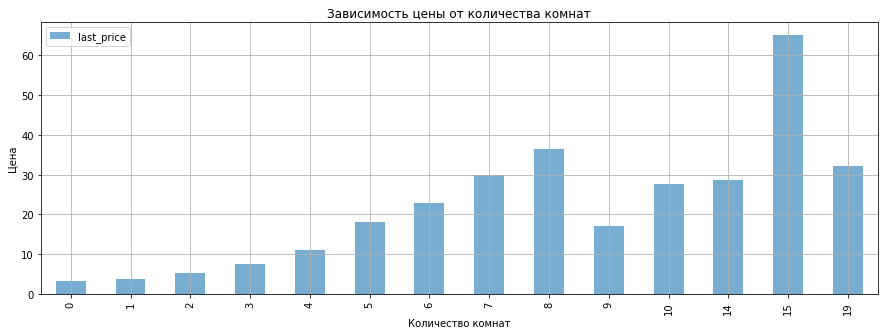

In [ ]:
# изучим зависимость цены от количества комнат, построим сводную таблицу и график
df.pivot_table(index=['rooms'], values='last_price').plot(kind='bar', grid=True, linewidth=3, alpha=0.6,figsize=(15,5))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

Цена зависит от количества комнат, но у самых дорогих квартир не самое большое количество комнат.

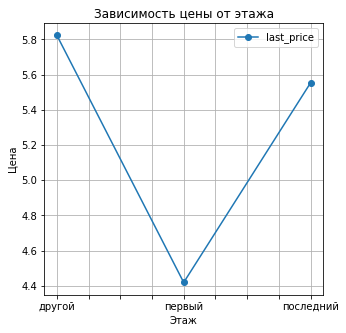

In [ ]:
# изучим зависимость цены от этажа, построим сводную таблицу и график
df.pivot_table(index='floor_group', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Цена')
plt.show()

На данном графике явно прослеживается зависимость от этажа, на котоором расположена квартира. Цена на первый этаж ниже всего, на средние этажи - самая высокая.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [ ]:
# создадим новый столбец - цена за квадратный метр
df['price_sq'] = df['last_price']/df['total_area']

In [ ]:
# Выберем топ 10 населенных пунктов и запишем в переменную
locality_10 = df.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
# Посчитем СРЕДНЮЮ цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
locality_10['meter_mean_10'] = df.pivot_table(index='locality_name', values='price_sq', aggfunc='mean')
# отсортируем список
locality_10_mean = locality_10.sort_values(by='meter_mean_10', ascending=False).reset_index()
locality_10_mean

,locality_name,first_day_exposition,meter_mean_10
0,санкт-петербург,10391,0.110020
1,пушкин,219,0.100733
2,деревня кудрово,227,0.092912
3,посёлок парголово,241,0.088996
4,посёлок мурино,457,0.086223
5,посёлок шушары,332,0.078120
6,колпино,257,0.074897
7,всеволожск,248,0.069347
8,гатчина,199,0.068489
9,выборг,163,0.057382


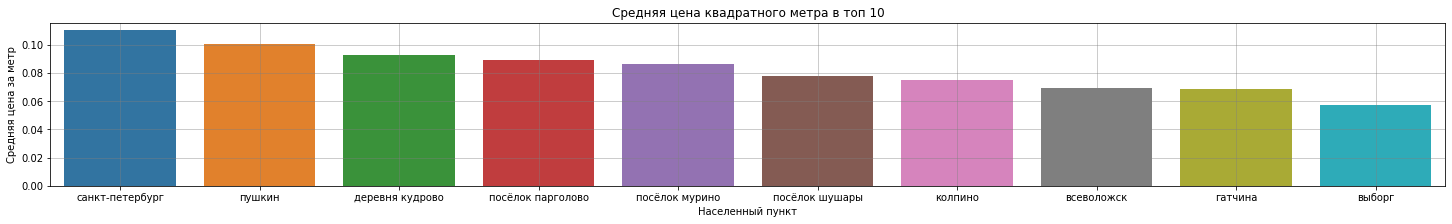

In [ ]:
plt.figure(figsize=(25, 3))

sns.barplot(data=locality_10_mean, x=locality_10_mean['locality_name'], y=locality_10_mean['meter_mean_10'])
plt.title('Средняя цена квадратного метра в топ 10')
plt.ylabel('Средняя цена за метр')
plt.xlabel('Населенный пункт')
plt.grid(color='grey', axis='both', alpha=0.5)
plt.show()

Самая высокая средняя цена квадратного метра в Санкт Петербурге. На втором месте Пушкин, далее идут пригороды, на последнем месте в десятке Выборг.

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [ ]:
# выберем санкт-петербург и посчитаем среднюю стоимость для каждого км
df.query('locality_name == "санкт-петербург"').pivot_table(index='distance_citycenter_km', values='last_price').head(10)

,last_price
distance_citycenter_km,
0,13.473179
1,14.895806
2,13.168438
3,10.404362
4,10.000663
5,11.682810
6,12.015381
7,10.990200
8,8.159417


Из таблицы видно, что с увеличением количества километров от цента, цена за квартиру падает.

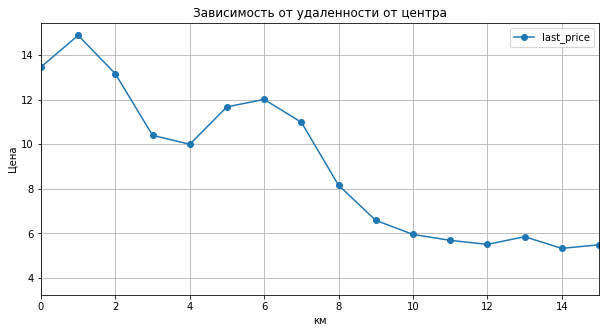

In [ ]:
# для наглядности построим график
df.query('locality_name == "санкт-петербург"').pivot_table(index='distance_citycenter_km', values='last_price').plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
plt.title('Зависимость от удаленности от центра')
plt.xlabel('км')
plt.ylabel('Цена')
plt.show()

На графике хорошо видно, что центр - это до 9 км и меньше. Дальше 9 км цена уже так сильно не зависит от удаленности от центра.

### Общий вывод

В данном исследовании были проанализированы объявления о продаже квартир в Санкт-Петербурге и в его пригородах.
При предобработке данных было выявлено большое количество пропусков, которые скорей всего были технические. По возможности данные были заполнены, но на будущее стоит предупредить сотрудников, отвечающих за выгрузку данных о возникших проблемах с данными. Кроме этого были устранены имеющиеся дубликаты. Такие ошибки в данных могут не повториться, если для заполения данных полей подключить справочник с названием населенного пункта. Пропуски в данных можно так же сократить, если на поля при заполнении поставить условие, что без данных вся карточка не будет сохраняться, тогда пользователь при отсутствии балкона например будет заполнять поле 0, поля аппаратменты, студия при таких условиях тоже будут заполнены.

Далее в проекте были добавлены новые поля, такие как: цена одного квадратного метра, день недели публикации объявления (0 — понедельник, 1 — вторник и так далее), месяц публикации объявления, год публикации объявления, тип этажа квартиры (значения — «первый», «последний», «другой»), расстояние до центра города в километрах. Все они пригодились для дальнейшего анализа.
В ходе исследования были изучена зависмость стоимости недвижимости от этажа, общей, жилой площадей, площади кухни, количества комнат и высоты потолков, наличия парков рядом и водоемов, удаленности от центра гора, аэропортов....

Для большей наглядности при анализе использовались графики, из которых легко можно сделать вывод о том, что лидером по размещению объявлений о продаже недвижимости является "Санкт-Петербург" с средней ценой 110 тысяч за квадратный метр, на втором месте Пушкин скорей всего потому, что это красивый город с большим количеством парков.
 Тенденция рынка такова, что люди в основнм ищут предложения 1-2-3 комнатных квартир на любом этаже за исключением первого и последнего с средней площадью до 100 метров и кухней до 15 метров, с высотой потолков 2, 65 м. Самые высокие цены на квартиры были в 2014 году, но в 2019 цены снова начали подниматься.  Самые высокие цены на квартиры в центре, а центром как выяснили можно считать расстояние в 9 км от центра. Далее цены не сильно меняются.

<div class="alert alert-info">
<b>Спасибо большое за проверку. Постаралась исправить ошибки и устранить ззамечания. Исправляя ошибки и пожелания я многому научилась и буду использовать в будущем. Спасибо</b>
<br>
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод